# Lets get imported what we need to get rolling

In [51]:
from scipy.io import wavfile
from scipy.signal import hilbert
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.fftpack import fft, ifft

## How many bars?
nr_bands = 20
nr_bars = 20
nfft = 1024*10
bar_width = .6

# Any frequency limitation?
f_max = 3000 # max freq in Hz


## Read the audiofile - make sure the path is correct

Sample rate: 44100 Hz
Number of samples: 156672


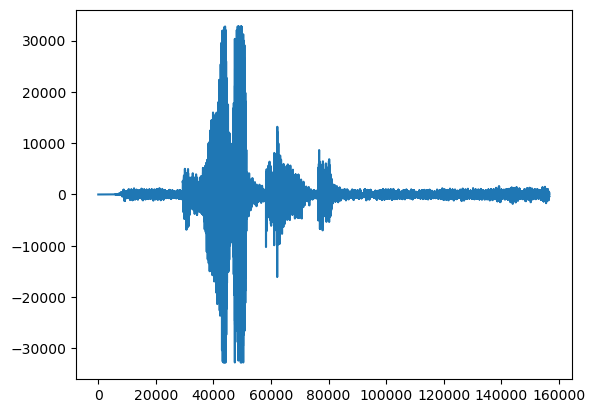

In [52]:
# Load the audio file

path2snd = 'wav/'
path2pic = 'pics/'
fname = 'wurstbrot'
#fname = 'frieda'
#fname = 'madita'
#fname = 'Railroad'
fend = '.wav'

f2read = path2snd + fname + fend

#sample_rate, data = wavfile.read('wav/Railroad.wav')
#sample_rate, data = sf.read('wav/wurstbrot.flac')

if (fend == '.flac'):
    data, sample_rate = sf.read(f2read)
else:
    sample_rate, data = wavfile.read(f2read)



# If stereo, convert to mono
if len(data.shape) == 2:
    data = data.mean(axis=1)

print(f"Sample rate: {sample_rate} Hz")
print(f"Number of samples: {len(data)}")

plt.plot(data)


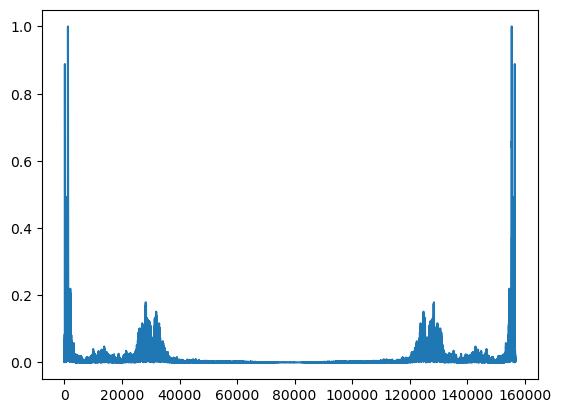

In [53]:
# Compute the spectrum signal and normalize
Y = fft(data)
Y = np.abs(Y)/max(np.abs(Y))

plt.plot(Y)

# Get the envelope of the mag spectrum
Y_env = np.abs(signal.hilbert(Y))

#freqs_pos = np.arange(0,sample_rate/2,1/(len(Y)/sample_rate))
freqs_pos = np.arange(0,f_max,1/(len(Y)/sample_rate))

# Now we have the magnitude spectrum - it is likely a bit "peaky" - so let's smoothen

B, A = signal.butter(5,.01,'low')

Y_lp = signal.filtfilt(B, A, (Y_env))
Y_lp = Y_lp

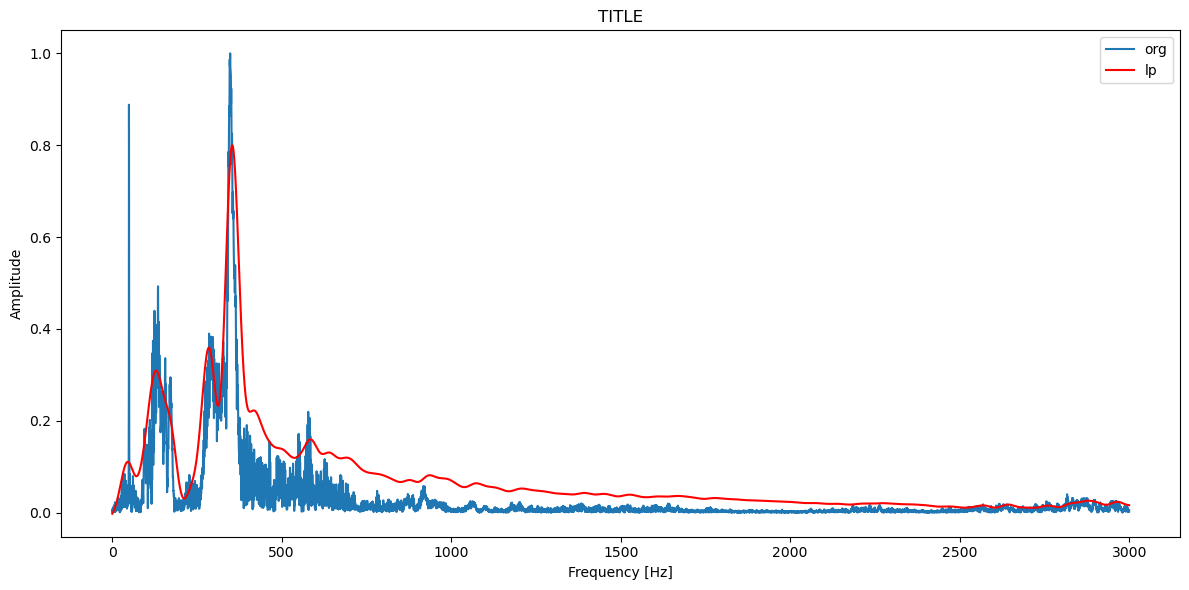

In [54]:
# Create frequency axis


# Plot the spectrum 
plt.figure(figsize=(12, 6))
plt.plot(freqs_pos, Y[0:len(freqs_pos)], label='org')
plt.plot(freqs_pos, Y_lp[0:len(freqs_pos)], label='lp', color='red')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('TITLE')
plt.legend()
plt.tight_layout()
plt.show()


# Cool - so let's do some artistic work

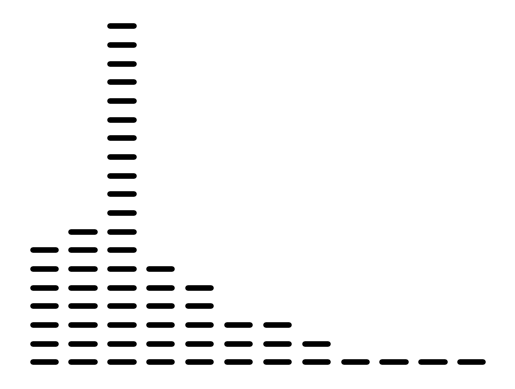

In [55]:
# LEts resample the envelope to get the desired number of bands
# Y_lp_re = signal.resample(Y_lp, nr_bands)
#f_re = signal.resample(freqs_pos, nr_bands)

# Let us divide into bands and average amplitudes
f_it = 1

# Here we get the index increment
delta_idx = int(len(freqs_pos)/nr_bands)

#print(delta_idx)
#print(len(freqs_pos))

idx_act = int(delta_idx/2)

f_re = np.zeros(nr_bands)
Y_re = np.zeros(nr_bands)

#print(f_re)

while ((idx_act < len(freqs_pos)) and f_it <= (nr_bands)) :
    # get upper and lower indx
    idx_low = idx_act - int(delta_idx/2)
    idx_high = idx_low + delta_idx 
    # assign freq and Y
    f_re[f_it-1] = freqs_pos[idx_act]
    Y_re[f_it-1] = np.mean(Y_env[idx_low:idx_high])
    # increment
    idx_act += int(delta_idx)
    f_it += 1
    

# Normalize resampled values
Y_re = Y_re / np.max(Y_re)


#plt.plot(f_re, Y_re,'o')

## Define function to plot bars
def freqbar(x, y, nr_bands, nr_bars, bar_width):
    for idx in range(0,nr_bands-1):
        #print(idx)
        for bar_idx in range(1,int(np.round(np.round(y[idx]*nr_bars)))):
            #print(bar_idx)
            ln, = plt.plot((x[idx]-bar_width/2,x[idx]+bar_width/2), (bar_idx/nr_bars,bar_idx/nr_bars), lw=nr_bars/5,  color='black')
            ln.set_solid_capstyle('round')
            #print(bar_idx/nr_bars)


# define the width in terms of Hz
bar_width_Hz = (sample_rate/len(Y)*delta_idx)*bar_width


freqbar(f_re, Y_re, nr_bands, nr_bars, bar_width_Hz)

plt.axis('off')
plt.savefig(path2pic + 'specbar_' + fname + '.png', format='png', dpi=600, transparent=True)
plt.savefig(path2pic + 'specbar_' + fname + '.svg', format='svg', transparent=True)
plt.show()